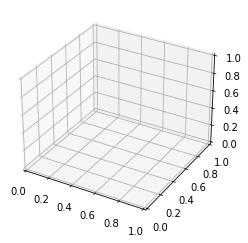

In [2]:
from mpl_toolkits import mplot3d
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.axes(projection='3d')

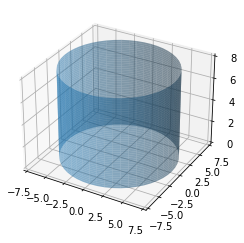

In [2]:
import numpy as np

def data_for_cylinder_along_z(center_x,center_y,radius,height_z):
    z = np.linspace(0, height_z, 50)
    theta = np.linspace(0, 2*np.pi, 50)
    theta_grid, z_grid=np.meshgrid(theta, z)
    x_grid = radius*np.cos(theta_grid) + center_x
    y_grid = radius*np.sin(theta_grid) + center_y
    return x_grid,y_grid,z_grid

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

Xc,Yc,Zc = data_for_cylinder_along_z(0,0,6.918747814735494,8.015622477970313)

plots = [ax.plot_surface(Xc, Yc, Zc, alpha=0.5)]
plt.show()

#import matplotlib.animation as animation
#from IPython.display import HTML
#ani = animation.FuncAnimation(fig, update, 100, fargs=(Xc,Yc,Zc,theta,plots), interval=100)
#ani.save('rotatevballZ.mp4', writer="ffmpeg",dpi=100)
#HTML(ani.to_html5_video())

In [19]:
Xc

array([[6.91874781, 6.86194499, 6.69246922, ..., 6.69246922, 6.86194499,
        6.91874781],
       [6.91874781, 6.86194499, 6.69246922, ..., 6.69246922, 6.86194499,
        6.91874781],
       [6.91874781, 6.86194499, 6.69246922, ..., 6.69246922, 6.86194499,
        6.91874781],
       ...,
       [6.91874781, 6.86194499, 6.69246922, ..., 6.69246922, 6.86194499,
        6.91874781],
       [6.91874781, 6.86194499, 6.69246922, ..., 6.69246922, 6.86194499,
        6.91874781],
       [6.91874781, 6.86194499, 6.69246922, ..., 6.69246922, 6.86194499,
        6.91874781]])

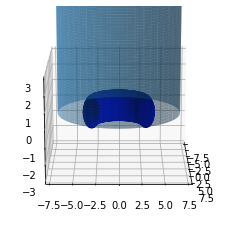

In [6]:

import numpy as np 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D 

n = 100 

# theta: poloidal angle; phi: toroidal angle 
theta = np.linspace(0, 2*np.pi, n) 
phi   = np.linspace(0, 2*np.pi, n) 
theta, phi = np.meshgrid(theta, phi) 

# R0: major radius; a: minor radius 
R0, a = 3.0796865214632985, 0.9581246858916144 

# torus parametrization 
x = (R0 + a*np.cos(theta)) * np.cos(phi)
y = (R0 + a*np.cos(theta)) * np.sin(phi) 
z = a * np.sin(theta) 

#p_rotated_x = x * np.sin(180) - y * np.sin(180)
#p_rotated_y = x * np.sin(90) + y * np.cos(90)
#p_rotate_z = z

# "cut-off" half of the torus using transparent colors 
c = np.full(x.shape + (4,), [0, 0, 0.85, 1])  # shape (nx, ny, 4)
c[x>0, -1] = 0 # set these to transparent 

fig = plt.figure() 
ax1 = fig.add_subplot(111, projection='3d') 
ax1.set_zlim(-3,3) 
#, ax1.plot_surface(Xc, Yc, Zc, alpha=0.5)
ax1.plot_surface(x,y,z, facecolors=c, rstride=5, cstride=5,)
ax1.plot_surface(Xc, Yc, Zc, alpha=0.5)
#plots = [ax1.plot_surface(x,y,z, facecolors=c, rstride=5, cstride=5,)]
# elev: elevation angle in z-plane 
# azim: azimuth angle in x,y plane 
ax1.view_init(elev=15, azim=0) 
plt.show()
def update(num,x,y,z,u,plot):
    plot[0].remove()
    x_= x * np.cos(u[num]) - y * np.sin(u[num])#uの再利用
    y_ = x * np.sin(u[num]) + y * np.cos(u[num])
    plot[0] = ax.plot_surface(x_, y_, z, cmap="magma")

#import matplotlib.animation as animation
#from IPython.display import HTML
#ani = animation.FuncAnimation(fig, update, 100, fargs=(x,y,z,theta,plots), interval=100)
#ani.save('rotatevballZ.mp4', writer="ffmpeg",dpi=100)
#HTML(ani.to_html5_video())

In [6]:
import plotly.graph_objects as go
fig = go.Figure(data=go.Bar(y=[2, 3, 1]))
fig.write_html('first_figure.html', auto_open=True)
#fig.show()

In [28]:
from plotly.subplots import make_subplots
Xc,Yc,Zc = data_for_cylinder_along_z(0,0,6.918747814735494,8.015622477970313)

fig = make_subplots(rows=1, cols=2,
                    specs=[[{'is_3d': True}, {'is_3d': True}]],
                    subplot_titles=['Color corresponds to z', 'Color corresponds to distance to origin'],
                    )

fig.add_trace(go.Surface(x=Xc, y=Yc, z=Zc, colorbar_x=-0.07), 1, 1)
fig.add_trace(go.Surface(x=Xc, y=Yc, z=Zc, surfacecolor=Xc**2 + Yc**2 + Zc**2), 1, 2)
fig.update_layout(title_text="Ring cyclide")
fig.write_html('second_figure.html', auto_open=True)
#fig.show()

[[ 4.03781121  4.03588219  4.03010291 ...  4.03010291  4.03588219
   4.03781121]
 [ 4.03577834  4.0338503   4.02807393 ...  4.02807393  4.0338503
   4.03577834]
 [ 4.02968179  4.02775666  4.02198901 ...  4.02198901  4.02775666
   4.02968179]
 ...
 [-4.02968179 -4.02775666 -4.02198901 ... -4.02198901 -4.02775666
  -4.02968179]
 [-4.03577834 -4.0338503  -4.02807393 ... -4.02807393 -4.0338503
  -4.03577834]
 [-4.03781121 -4.03588219 -4.03010291 ... -4.03010291 -4.03588219
  -4.03781121]]


NameError: name 'make_subplots' is not defined

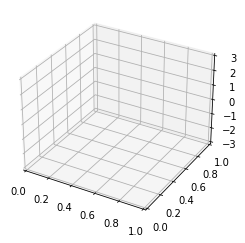

In [15]:
n = 100

# theta: poloidal angle; phi: toroidal angle 
theta = np.linspace(0, 2*np.pi, n) 
phi   = np.linspace(0, np.pi, n) 
theta, phi = np.meshgrid(theta, phi) 

# R0: major radius; a: minor radius 
R0, a = 3.0796865214632985, 0.9581246858916144 

# torus parametrization 
x = (R0 + a*np.cos(theta)) * np.cos(phi)
y = (R0 + a*np.cos(theta)) * np.sin(phi) 
z = a * np.sin(theta) 
print(x)
#p_rotated_x = x * np.sin(180) - y * np.sin(180)
#p_rotated_y = x * np.sin(90) + y * np.cos(90)
#p_rotate_z = z

# "cut-off" half of the torus using transparent colors 
c = np.full(x.shape + (4,), [0, 0, 0.85, 1])  # shape (nx, ny, 4)
c[x>0, -1] = 0 # set these to transparent 

fig = plt.figure() 
ax1 = fig.add_subplot(111, projection='3d') 
ax1.set_zlim(-3,3) 
#, ax1.plot_surface(Xc, Yc, Zc, alpha=0.5)

#plots = [ax1.plot_surface(x,z, y, facecolors=c, rstride=5, cstride=5,)]
# elev: elevation angle in z-plane 
# azim: azimuth angle in x,y plane 
#ax1.view_init(elev=15, azim=0) 

fig = make_subplots(rows=1, cols=2,
                    specs=[[{'is_3d': True}, {'is_3d': True}]],
                    subplot_titles=['Color corresponds to z', 'Color corresponds to distance to origin'],
                    )

fig.add_trace(go.Surface(x=x, y=z, z=y, colorbar_x=-0.07), 1, 1)
fig.add_trace(go.Surface(x=x, y=y, z=z, surfacecolor=c), 1, 2)
fig.update_layout(title_text="Ring cyclide")
fig.write_html('third_figure.html', auto_open=True)
#fig.show()

In [5]:
import plotly.figure_factory as ff
import plotly.graph_objects as go

from scipy.spatial import Delaunay

u = np.linspace(0, np.pi, 100)
v = np.linspace(0, 2*np.pi, 100)
u,v = np.meshgrid(u,v)
u = u.flatten()
v = v.flatten()
R0, a = 3.0796865214632985, 0.9581246858916144 

x = (R0 + a*(np.cos(v)))*np.cos(u)
y = (R0 + a*(np.cos(v)))*np.sin(u)
z = a*np.sin(v)

points2D = np.vstack([u,v]).T
tri = Delaunay(points2D)
simplices = tri.simplices

fig = ff.create_trisurf(x=x, y=y, z=z,
                         simplices=simplices,
                            plot_edges=False,
                         title="Torus", aspectratio=dict(x=1, y=1, z=0.3))
fig.add_mesh3d(go.Surface(x=Xc, y=Yc, z=Zc), 1, 1)
fig.write_html('fourth_figure.html', auto_open=True)
#fig.show()

ValueError: 
    Invalid value of type 'plotly.graph_objs._surface.Surface' received for the 'alphahull' property of mesh3d
        Received value: Surface({
    'x': array([[6.91874781, 6.86194499, 6.69246922, ..., 6.69246922, 6.86194499,
                 6.91874781],
                [6.91874781, 6.86194499, 6.69246922, ..., 6.69246922, 6.86194499,
                 6.91874781],
                [6.91874781, 6.86194499, 6.69246922, ..., 6.69246922, 6.86194499,
                 6.91874781],
                ...,
                [6.91874781, 6.86194499, 6.69246922, ..., 6.69246922, 6.86194499,
                 6.91874781],
                [6.91874781, 6.86194499, 6.69246922, ..., 6.69246922, 6.86194499,
                 6.91874781],
                [6.91874781, 6.86194499, 6.69246922, ..., 6.69246922, 6.86194499,
                 6.91874781]]),
    'y': array([[ 0.00000000e+00,  8.84749833e-01,  1.75497210e+00, ...,
                 -1.75497210e+00, -8.84749833e-01, -1.69460447e-15],
                [ 0.00000000e+00,  8.84749833e-01,  1.75497210e+00, ...,
                 -1.75497210e+00, -8.84749833e-01, -1.69460447e-15],
                [ 0.00000000e+00,  8.84749833e-01,  1.75497210e+00, ...,
                 -1.75497210e+00, -8.84749833e-01, -1.69460447e-15],
                ...,
                [ 0.00000000e+00,  8.84749833e-01,  1.75497210e+00, ...,
                 -1.75497210e+00, -8.84749833e-01, -1.69460447e-15],
                [ 0.00000000e+00,  8.84749833e-01,  1.75497210e+00, ...,
                 -1.75497210e+00, -8.84749833e-01, -1.69460447e-15],
                [ 0.00000000e+00,  8.84749833e-01,  1.75497210e+00, ...,
                 -1.75497210e+00, -8.84749833e-01, -1.69460447e-15]]),
    'z': array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
                 0.        ],
                [0.16358413, 0.16358413, 0.16358413, ..., 0.16358413, 0.16358413,
                 0.16358413],
                [0.32716826, 0.32716826, 0.32716826, ..., 0.32716826, 0.32716826,
                 0.32716826],
                ...,
                [7.68845421, 7.68845421, 7.68845421, ..., 7.68845421, 7.68845421,
                 7.68845421],
                [7.85203835, 7.85203835, 7.85203835, ..., 7.85203835, 7.85203835,
                 7.85203835],
                [8.01562248, 8.01562248, 8.01562248, ..., 8.01562248, 8.01562248,
                 8.01562248]])
})

    The 'alphahull' property is a number and may be specified as:
      - An int or float

In [52]:
len(u)

10000

In [16]:
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

from scipy.spatial import Delaunay
Xc,Yc,Zc = data_for_cylinder_along_z(0,0,6.918747814735494,8.015622477970313)

u = np.linspace(0, np.pi, 20)
v = np.linspace(0, 2*np.pi, 20)
u,v = np.meshgrid(u,v)
u = u.flatten()
v = v.flatten()
R0, a = 3.0796865214632985, 0.9581246858916144 

x = (R0 + a*(np.cos(v)))*np.cos(u)
y = (R0 + a*(np.cos(v)))*np.sin(u)
z = a*np.sin(v)

points2D = np.vstack([u,v]).T
tri = Delaunay(points2D)
simplices = tri.simplices

fig = make_subplots(rows=1, cols=2,
                    specs=[[{'is_3d': True}, {'is_3d': True}]],
                    subplot_titles=['Color corresponds to z', 'Color corresponds to distance to origin'],
                    )

fig.add_trace(go.Surface(x=Xc, y=Yc, z=Zc), 1, 1)
fig.add_trace(go.Surface(x=x, y=y, z=z), 1,2)
fig.update_layout(title_text="Ring cyclide")

                         #simplices=simplices,
                        #plot_edges=False,
                         #title="Torus", aspectratio=dict(x=1, y=1, z=0.3)),
                         
fig.write_html('7_figure.html', auto_open=True)


In [40]:
simplices

array([[  1,  20,   0],
       [ 20,   1,  21],
       [  3,   4,  23],
       ...,
       [112,  92,  93],
       [ 92, 112,  91],
       [112, 111,  91]], dtype=int32)

In [17]:
points2D

array([[0.        , 0.        ],
       [0.16534698, 0.        ],
       [0.33069396, 0.        ],
       [0.49604095, 0.        ],
       [0.66138793, 0.        ],
       [0.82673491, 0.        ],
       [0.99208189, 0.        ],
       [1.15742887, 0.        ],
       [1.32277585, 0.        ],
       [1.48812284, 0.        ],
       [1.65346982, 0.        ],
       [1.8188168 , 0.        ],
       [1.98416378, 0.        ],
       [2.14951076, 0.        ],
       [2.31485774, 0.        ],
       [2.48020473, 0.        ],
       [2.64555171, 0.        ],
       [2.81089869, 0.        ],
       [2.97624567, 0.        ],
       [3.14159265, 0.        ],
       [0.        , 0.33069396],
       [0.16534698, 0.33069396],
       [0.33069396, 0.33069396],
       [0.49604095, 0.33069396],
       [0.66138793, 0.33069396],
       [0.82673491, 0.33069396],
       [0.99208189, 0.33069396],
       [1.15742887, 0.33069396],
       [1.32277585, 0.33069396],
       [1.48812284, 0.33069396],
       [1.

In [18]:
tri

In [5]:
import plotly.figure_factory as ff
import plotly.graph_objects as go

from scipy.spatial import Delaunay

fig = plt.figure()
ax = fig.gca(projection='3d')               # to work in 3d
plt.hold(True)

u = np.linspace(0, np.pi, 100)
v = np.linspace(0, 2*np.pi, 100)
u,v = np.meshgrid(u,v)
u = u.flatten()
v = v.flatten()
R0, a = 3.0796865214632985, 0.9581246858916144 

x = (R0 + a*(np.cos(v)))*np.cos(u)
y = (R0 + a*(np.cos(v)))*np.sin(u)
z = a*np.sin(v)

points2D = np.vstack([u,v]).T
tri = Delaunay(points2D)
simplices = tri.simplices

fig = ff.create_trisurf(x=x, y=y, z=z,
                         simplices=simplices,
                            plot_edges=False,
                         title="Torus", aspectratio=dict(x=1, y=1, z=0.3))
fig.add_mesh3d(go.Surface(x=Xc, y=Yc, z=Zc), 1, 1)
fig.write_html('fourth_figure.html', auto_open=True)
#fig.show()

ValueError: 
    Invalid value of type 'plotly.graph_objs._surface.Surface' received for the 'alphahull' property of mesh3d
        Received value: Surface({
    'x': array([[6.91874781, 6.86194499, 6.69246922, ..., 6.69246922, 6.86194499,
                 6.91874781],
                [6.91874781, 6.86194499, 6.69246922, ..., 6.69246922, 6.86194499,
                 6.91874781],
                [6.91874781, 6.86194499, 6.69246922, ..., 6.69246922, 6.86194499,
                 6.91874781],
                ...,
                [6.91874781, 6.86194499, 6.69246922, ..., 6.69246922, 6.86194499,
                 6.91874781],
                [6.91874781, 6.86194499, 6.69246922, ..., 6.69246922, 6.86194499,
                 6.91874781],
                [6.91874781, 6.86194499, 6.69246922, ..., 6.69246922, 6.86194499,
                 6.91874781]]),
    'y': array([[ 0.00000000e+00,  8.84749833e-01,  1.75497210e+00, ...,
                 -1.75497210e+00, -8.84749833e-01, -1.69460447e-15],
                [ 0.00000000e+00,  8.84749833e-01,  1.75497210e+00, ...,
                 -1.75497210e+00, -8.84749833e-01, -1.69460447e-15],
                [ 0.00000000e+00,  8.84749833e-01,  1.75497210e+00, ...,
                 -1.75497210e+00, -8.84749833e-01, -1.69460447e-15],
                ...,
                [ 0.00000000e+00,  8.84749833e-01,  1.75497210e+00, ...,
                 -1.75497210e+00, -8.84749833e-01, -1.69460447e-15],
                [ 0.00000000e+00,  8.84749833e-01,  1.75497210e+00, ...,
                 -1.75497210e+00, -8.84749833e-01, -1.69460447e-15],
                [ 0.00000000e+00,  8.84749833e-01,  1.75497210e+00, ...,
                 -1.75497210e+00, -8.84749833e-01, -1.69460447e-15]]),
    'z': array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
                 0.        ],
                [0.16358413, 0.16358413, 0.16358413, ..., 0.16358413, 0.16358413,
                 0.16358413],
                [0.32716826, 0.32716826, 0.32716826, ..., 0.32716826, 0.32716826,
                 0.32716826],
                ...,
                [7.68845421, 7.68845421, 7.68845421, ..., 7.68845421, 7.68845421,
                 7.68845421],
                [7.85203835, 7.85203835, 7.85203835, ..., 7.85203835, 7.85203835,
                 7.85203835],
                [8.01562248, 8.01562248, 8.01562248, ..., 8.01562248, 8.01562248,
                 8.01562248]])
})

    The 'alphahull' property is a number and may be specified as:
      - An int or float

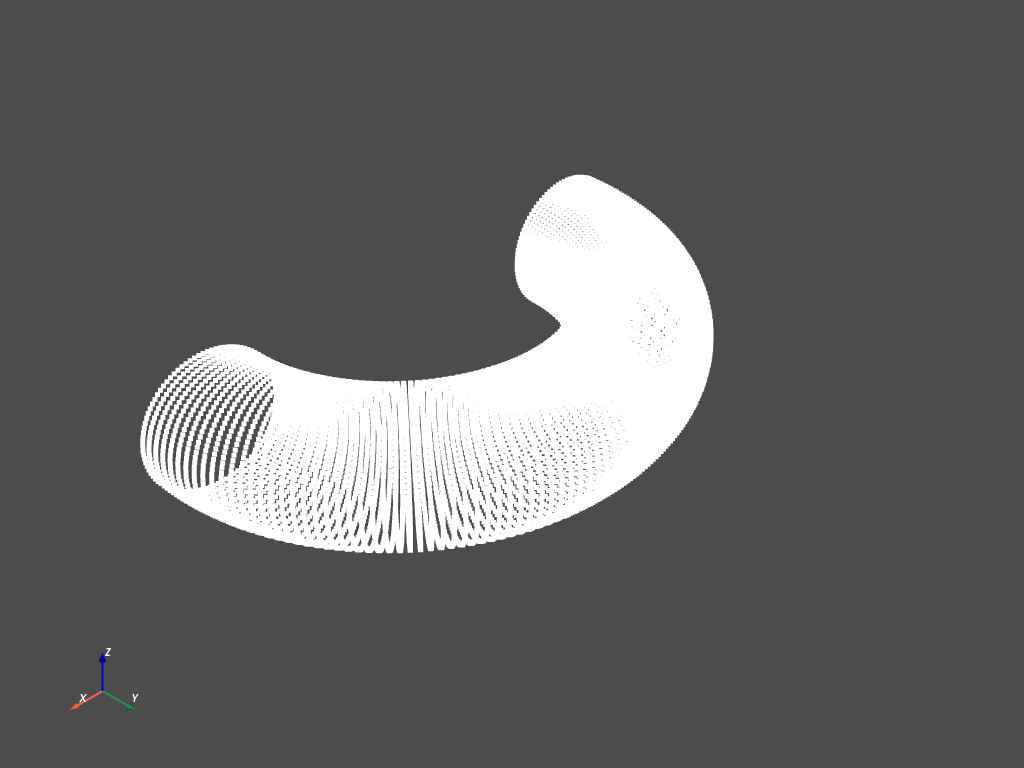

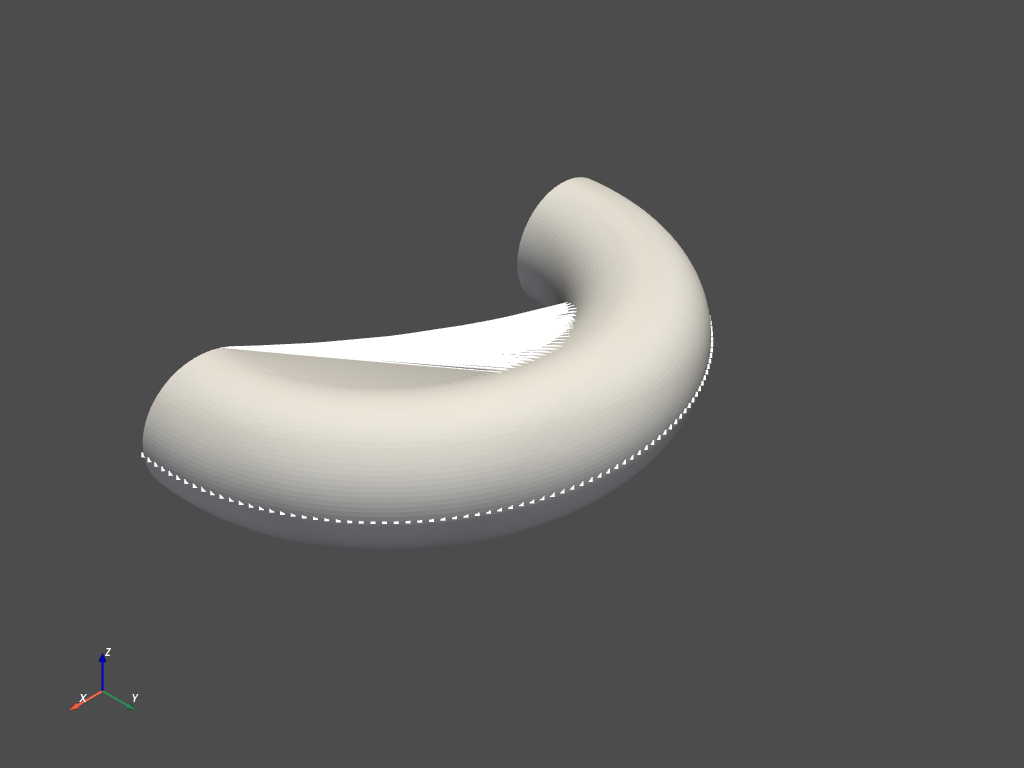

WriteError: Wavefront .obj files can only contain triangle or quad cells.

In [18]:
import pyvista as pv
points = []

for i in range(len(x)):
    for j in range(len(x[i])):
        points.append([x[i][j],y[i][j],z[i][j]])
# points is a 3D numpy array (n_points, 3) coordinates of a sphere
cloud = pv.PolyData(points)
cloud.plot()

volume = cloud.delaunay_3d(alpha=2.)
shell = volume.extract_geometry()
shell.plot()
pv.save_meshio("mesh.obj", shell)

In [17]:
points

[[4.037811207354913, 0.0, 0.0],
 [4.035882192381939, 0.0, 0.06076802309896085],
 [4.03010291492548, 0.0, 0.1212913548165973],
 [4.020496646096092, 0.0, 0.18132628905741519],
 [4.007102066947878, 0.0, 0.24063108633018274],
 [3.9899731127235367, 0.0, 0.298966947147541],
 [3.9691787556761704, 0.0, 0.3560989735872574],
 [3.94480272734237, 0.0, 0.41179711514325157],
 [3.916943181384869, 0.0, 0.4658370950577897],
 [3.885712298362385, 0.0, 0.51800131340483],
 [3.8512358340181034, 0.0, 0.568079723288125],
 [3.813652612905686, 0.0, 0.6158706766259371],
 [3.7731139693917886, 0.0, 0.6611817361166944],
 [3.72978313828598, 0.0, 0.7038304501160834],
 [3.683834597551776, 0.0, 0.7436450873054266],
 [3.6354533657454633, 0.0, 0.7804653281930907],
 [3.5848342570116705, 0.0, 0.8141429106644954],
 [3.5321810966355702, 0.0, 0.8445422269813215],
 [3.477705900310392, 0.0, 0.8715408698260103],
 [3.421628020425056, 0.0, 0.8950301251928291],
 [3.3641732628095222, 0.0, 0.9149154101408018],
 [3.30557297749441, 0.0

In [9]:
import pygalmesh

s0 = pygalmesh.Tetrahedron(
    points
)
mesh = pygalmesh.generate_mesh(
    s0,
    max_cell_circumradius=0.1,
    max_edge_size_at_feature_edges=0.1,
)

ModuleNotFoundError: No module named 'pygalmesh'

In [ ]:
import open3d as o3d

pcd = o3d.io.read_point_cloud(points)


In [13]:
import bpy
 
# make mesh
vertices = points
edges = []
faces = []
new_mesh = bpy.data.meshes.new('new_mesh')
new_mesh.from_pydata(vertices, edges, faces)
new_mesh.update()
# make object from mesh
new_object = bpy.data.objects.new('new_object', new_mesh)
# make collection
new_collection = bpy.data.collections.new('new_collection')
bpy.context.scene.collection.children.link(new_collection)
# add object to scene collection
new_collection.objects.link(new_object)

ModuleNotFoundError: No module named 'bpy'

In [14]:
x

array([[4.03781121, 4.03588219, 4.03010291, ..., 4.03010291, 4.03588219,
        4.03781121],
       [4.02968179, 4.02775666, 4.02198901, ..., 4.02198901, 4.02775666,
        4.02968179],
       [4.00532626, 4.00341276, 3.99767998, ..., 3.99767998, 4.00341276,
        4.00532626],
       ...,
       [4.00532626, 4.00341276, 3.99767998, ..., 3.99767998, 4.00341276,
        4.00532626],
       [4.02968179, 4.02775666, 4.02198901, ..., 4.02198901, 4.02775666,
        4.02968179],
       [4.03781121, 4.03588219, 4.03010291, ..., 4.03010291, 4.03588219,
        4.03781121]])

In [21]:
import math

a = 0
b = 0
c = 1
r = 5.372516525942034

#The lower this value the higher quality the circle is with more points generated
stepSize = 0.1

#Generated vertices
positions = []

u = 0
v = -math.pi/2
while u < 2 * math.pi:
    while v < math.pi/2:
        positions.append([r * math.sin(u) * math.cos(v) + a, r * math.cos(u) * math.cos(v) + b, r * math.sin(v) +  c])
        v += stepSize
    u += stepSize

print(positions)

[(0.0, 3.289717583430585e-16, -4.372516525942034), (0.0, 0.5363566807763416, -4.345676321337352), (0.0, 1.0673542628943122, -4.265423885975525), (0.0, 1.5876871940378536, -4.13256107566276), (0.0, 2.0921564795581786, -3.948415411681096), (0.0, 2.575721629109744, -3.7148268166345737), (0.0, 3.0335510195636153, -3.4341292305507753), (0.0, 3.4610701709886538, -3.1091272909235643), (0.0, 3.854007453342864, -2.7430683097023376), (0.0, 4.208436767188758, -2.3396098272244465), (0.0, 4.520816771981143, -1.9027830672811668), (0.0, 4.788026269971235, -1.436952658462122), (0.0, 5.007395392182833, -0.946773024229173), (0.0, 5.176732274860588, -0.4371418774557301), (0.0, 5.294344959848118, 0.08684871590130605), (0.0, 5.359058300074611, 0.6199632150413735), (0.0, 5.370225701235909, 1.1568749161132885), (0.0, 5.327735582351062, 1.6922191748793525), (0.0, 5.232012490642601, 2.220647008467259), (0.0, 5.08401285960103, 2.7368785406388163), (0.0, 4.885215452617541, 3.2357557565680226), (0.0, 4.6376065876

In [30]:
x_p = []
y_p = []
for x in range(-11,11):
    for y in range(-11,11):
        print(math.pow(x,2))
        if math.pow(x,2) + math.pow(x,2) < 1:
            x_p.append(x)
            y_p.append(y)
#plot(,y_p)

121.0
121.0
121.0
121.0
121.0
121.0
121.0
121.0
121.0
121.0
121.0
121.0
121.0
121.0
121.0
121.0
121.0
121.0
121.0
121.0
121.0
121.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
100.0
81.0
81.0
81.0
81.0
81.0
81.0
81.0
81.0
81.0
81.0
81.0
81.0
81.0
81.0
81.0
81.0
81.0
81.0
81.0
81.0
81.0
81.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
64.0
49.0
49.0
49.0
49.0
49.0
49.0
49.0
49.0
49.0
49.0
49.0
49.0
49.0
49.0
49.0
49.0
49.0
49.0
49.0
49.0
49.0
49.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
36.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
25.0
16.0
16.0
16.0
16.0
16.0
16.0
16.0
16.0
16.0
16.0
16.0
16.0
16.0
16.0
16.0
16.0
16.0
16.0
16.0
16.0
16.0
16.0
9.0
9.0
9.0
9.0
9.0
9.0
9.0
9.0
9.0
9.0
9.0
9.0
9.0
9.0
9.0
9.0
9.0
9.0
9.0


In [31]:
x_p

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [32]:
y_p

[-11,
 -10,
 -9,
 -8,
 -7,
 -6,
 -5,
 -4,
 -3,
 -2,
 -1,
 0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10]